<a href="https://colab.research.google.com/github/SoominJeon/Task1/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading and brief analysis

In [3]:
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd 

data=pd.read_csv("/content/drive/MyDrive/COLAB_SM/SpineSurgery/xr_data_spine_surgery_wristfracture.csv")

# Data structure

In [4]:
data.head()

,Unnamed: 0,PatientID,AccessionNumber,SeriesNumber,InstanceNumber,Modality,ViewPosition,PatientSex,PatientAge,Manufacturer,PATH
0,0,5324252,E10649388,7,1,DX,AP,F,66,Agfa,E10649388_DX_AP_000007_000001.dcm
1,1,5324252,E10649388,6,1,DX,AP,F,66,Agfa,E10649388_DX_AP_000006_000001.dcm
2,2,5324252,E10649388,8,1,DX,AP,F,66,Agfa,E10649388_DX_AP_000008_000001.dcm
3,3,5324252,E10649388,9,1,DX,AP,F,66,Agfa,E10649388_DX_AP_000009_000001.dcm
4,4,3110287,E12119821,7,1,DX,AP,M,62,Agfa,E12119821_DX_AP_000007_000001.dcm


In [5]:
data.shape

(5509, 11)

In [6]:
data.columns

Index(['Unnamed: 0', 'PatientID', 'AccessionNumber', 'SeriesNumber',
       'InstanceNumber', 'Modality', 'ViewPosition', 'PatientSex',
       'PatientAge', 'Manufacturer', 'PATH'],
      dtype='object')

In [7]:
data.describe()  # meaningless

,Unnamed: 0,PatientID,SeriesNumber,InstanceNumber,PatientAge
count,5509.000000,5.509000e+03,5509.000000,5509.000000,5509.000000
mean,2756.160828,4.385830e+06,2061.056816,40.399710,54.078599
std,1591.797836,4.056569e+06,11665.955858,223.003505,18.087352
min,0.000000,1.728000e+03,1.000000,1.000000,7.000000
25%,1378.000000,2.948993e+06,2.000000,1.000000,42.000000
50%,2757.000000,4.311782e+06,3.000000,1.000000,56.000000
75%,4134.000000,5.924366e+06,6.000000,1.000000,66.000000
max,5512.000000,1.001226e+08,105636.000000,3004.000000,118.000000


# Arrange the patient ID and corresponding info (without redundancy)

In [8]:
PID=data['PatientID']
_PID, _IND, _INV, _CNT = np.unique(PID, return_index=True, return_inverse=True, return_counts=True)

In [9]:
_SEX=np.zeros(len(_PID))
_SEX = []
_AGE=np.zeros(len(_PID))
_Manufacture = []
_Modality = []

In [10]:
for i, ind in enumerate(_IND):
    _SEX.append(data.PatientSex[ind])
    _AGE[i] = data.PatientAge[ind]
    _Manufacture.append(data.Manufacturer[ind])
    _Modality.append(data.Modality[ind])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

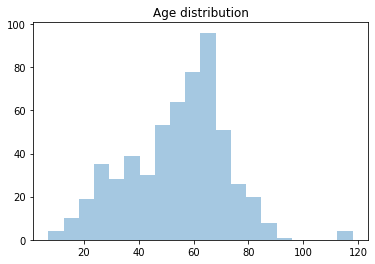

In [11]:
sns.distplot(a=_AGE, kde=False, label='Age').set_title('Age distribution')
#sns.distplot(a=data['PatientAge'], kde=False)

['F' 'M']
[387 179]


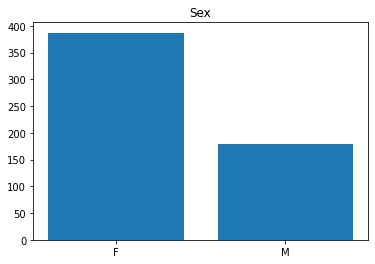

In [21]:
__sex, __sexcount= np.unique(_SEX, return_counts=True)
print(__sex)
print(__sexcount)
plt.bar(__sex,__sexcount)
plt.title('Sex')
plt.show()


['"GE Healthcare"' 'AMICAS-NSC' 'Agfa' 'CARESTREAM HEALTH' 'Canon Inc.'
 'Carestream Health' 'FUJI PHOTO FILM Co., ltd.,' 'FUJIFILM Corporation'
 'FUJIFILM Medical Systems USA, Inc.' 'GE Healthcare' 'GE MEDICAL SYSTEMS'
 'IRAY' 'KONICA MINOLTA' 'Konica Minolta' 'Lexmark' 'LifeImageNotify'
 'PACSGEAR' 'Philips' 'Philips Medical Systems' 'SIEMENS'
 'Samsung Electronics' 'Toshiba' 'Varian' 'Visage PR']
[ 10   2 376   7   2   3   2  30   1  13  23  12   7   2   1  25   1   1
   8  13   1   2  21   3]


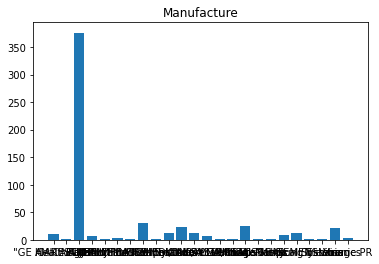

In [22]:
__manu, __manu_count= np.unique(_Manufacture, return_counts=True)
print(__manu)
print(__manu_count)
plt.bar(__manu,__manu_count)
plt.title('Manufacture')
plt.show()


['CR' 'DOC' 'DX' 'PR' 'SC' 'SR']
[ 79   2 478   3   1   3]


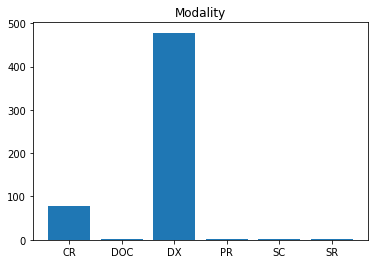

In [23]:
__modality, __moda_count= np.unique(_Modality, return_counts=True)
print(__modality)
print(__moda_count)
plt.bar(__modality,__moda_count)
plt.title('Modality')
plt.show()

In [24]:
for i, ind in enumerate(_PID):
    #i=0
    #pid=_PID[i]
    #invID=np.asarray(np.where(_INV==i))
    _pidSet=data.PatientID[_INV==i]
    _vpSet=data.ViewPosition[_INV==i]
    _modalSet=data.Modality[_INV==i]
    _ManuSet=data.Manufacturer[_INV==i]
    #print(_pidSet) 
    #print(_vpSet) 
    #print( _modalSet) 
    #print( _ManuSet)

In [25]:
print("Number of Patient: %d" % len(_PID) )
print("Number of %s/%s: %d / %d " %(__sex[0], __sex[1], __sexcount[0], __sexcount[1]))
print("Number of Manufacture: ")
for i, name in enumerate(__manu):
    print("\t %s : %d" %(name, __manu_count[i]))


Number of Patient: 566
Number of F/M: 387 / 179 
Number of Manufacture: 
	 "GE Healthcare" : 10
	 AMICAS-NSC : 2
	 Agfa : 376
	 CARESTREAM HEALTH : 7
	 Canon Inc. : 2
	 Carestream Health : 3
	 FUJI PHOTO FILM Co., ltd., : 2
	 FUJIFILM Corporation : 30
	 FUJIFILM Medical Systems USA, Inc. : 1
	 GE Healthcare : 13
	 GE MEDICAL SYSTEMS : 23
	 IRAY : 12
	 KONICA MINOLTA : 7
	 Konica Minolta : 2
	 Lexmark : 1
	 LifeImageNotify : 25
	 PACSGEAR : 1
	 Philips : 1
	 Philips Medical Systems : 8
	 SIEMENS : 13
	 Samsung Electronics : 1
	 Toshiba : 2
	 Varian : 21
	 Visage PR : 3
